# Feature generation

## Feature generated

In this notebook we will try generate the following features based on the dataset : 

cumulated depth : somme des volumes disponibles jusqu’à un certain niveau
(p. ex. top 10) de chaque côté

imbalance of the book-order : (V_bid - V_ask)/(V_bid + V_ask)

Écart acheteur-vendeur (Spread) :
prix_ask_min – prix_bid_max

liquidity ratio : V_bid/V_ask

Statistical temporal features: Instantaneous volatility (variance over short windows), momentum (change in mid-price, trend indicators), and volume indicators (VWAP, average volume).

Other : book slope (slope of the volume-price curve), implied volatility indicators, etc.



Cannot be done with the current data :

Order Flow : somme entre volume total
d’ordres acheteurs et vendeurs exécutés (ou modifiés) sur une fenêtre

Order Flow Imbalance : différence entre volume total
d’ordres acheteurs et vendeurs exécutés (ou modifiés) sur une fenêtre

Multi-line order flow : Extension of OFI, measuring the net flow at the top N levels


In [1]:
import pandas as pd

In [2]:
coin = "ETH"
I = 0


df = pd.read_parquet(f'../data/preprocessed/DATA_{I}/{coin}_EUR.parquet')


df_cleaned = pd.DataFrame(index=df.index.get_level_values(0).unique())
features = pd.DataFrame(index=df.index.get_level_values(0).unique())

Keeping only one row data for each timestep

In [3]:
df

level-10-bid-price  level-9-bid-price  \
timestamp    row_id                                           
1.748488e+09 0                   2452.25            2452.44   
             1                   2452.25            2452.44   
             2                   2452.25            2452.44   
             3                   2452.25            2452.44   
             4                   2452.44            2452.49   
...                                  ...                ...   
1.748523e+09 2684997             2375.26            2375.32   
             2684998             2375.25            2375.26   
             2684999             2375.25            2375.26   
             2685000             2375.23            2375.25   
             2685001             2375.23            2375.25   

                      level-8-bid-price  level-7-bid-price  level-6-bid-price  \
timestamp    row_id                                                             
1.748488e+09 0                  2452.49            2452.50            2452.52   
             1                  2452.49            2452.50            2452.52   
             2                  2452.49            2452.50            2452.52   
             3                  2452.49            2452.50            2452.52   
             4                  2452.50            2452.52            2452.54   
...                                 ...                ...                ...   
1.748523e+09 2684997            2375.39            2375.41            2375.47   
             2684998            2375.32            2375.39            2375.41   
             2684999            2375.32            2375.39            2375.41   
             2685000            2375.26            2375.32            2375.39   
             2685001            2375.26            2375.32            2375.39   

                      level-5-bid-price  level-4-bid-price  level-3-bid-price  \
timestamp    row_id                                                             
1.748488e+09 0                  2452.54            2452.61            2452.77   
             1                  2452.54            2452.61            2452.77   
             2                  2452.54            2452.61            2452.77   
             3                  2452.54            2452.61            2452.77   
             4                  2452.61            2452.77            2452.94   
...                                 ...                ...                ...   
1.748523e+09 2684997            2375.56            2375.66            2375.68   
             2684998            2375.47            2375.66            2375.68   
             2684999            2375.47            2375.66            2375.68   
             2685000            2375.41            2375.66            2375.68   
             2685001            2375.41            2375.66            2375.68   

                      level-2-bid-price  level-1-bid-price  ...  \
timestamp    row_id                                         ...   
1.748488e+09 0                  2452.94            2453.02  ...   
             1                  2452.94            2453.02  ...   
             2                  2452.94            2453.02  ...   
             3                  2452.94            2453.02  ...   
             4                  2452.99            2453.02  ...   
...                                 ...                ...  ...   
1.748523e+09 2684997            2375.88            2375.89  ...   
             2684998            2375.88            2375.89  ...   
             2684999            2375.88            2375.89  ...   
             2685000            2375.88            2375.89  ...   
             2685001            2375.88            2375.89  ...   

                      level-1-ask-volume  level-2-ask-volume  \
timestamp    row_id                                            
1.748488e+09 0                  0.004709            1.004171   
             1                

In [4]:
# Compute weighted average price "level-i-side-price" for each i and side by volume for each unique timestamp

# We'll compute the weighted average price for each side ('bid', 'ask') and each level (1 to 10)
# for each unique timestamp (ignoring row_id)

# For each level and side, compute the volume-weighted average price per timestamp and store in features

for side in ['bid', 'ask']:
    for i in range(1, 11):
        price_col = f'level-{i}-{side}-price'
        volume_col = f'level-{i}-{side}-volume'
        # Weighted average price per timestamp (ignoring row_id)
        weighted_avg = (
            df[price_col] * df[volume_col]
        ).groupby(level=0).sum() / df[volume_col].groupby(level=0).sum()
        # Assign weighted average price to df_cleaned DataFrame, indexed by unique timestamp
        df_cleaned.loc[weighted_avg.index, f'{price_col}'] = weighted_avg.values
        # Compute and assign average volume per timestamp
        avg_volume = df[volume_col].groupby(level=0).mean()
        df_cleaned.loc[avg_volume.index, f'{volume_col}'] = avg_volume.values

df_cleaned



,level-1-bid-price,level-1-bid-volume,level-2-bid-price,level-2-bid-volume,level-3-bid-price,level-3-bid-volume,level-4-bid-price,level-4-bid-volume,level-5-bid-price,level-5-bid-volume,...,level-6-ask-price,level-6-ask-volume,level-7-ask-price,level-7-ask-volume,level-8-ask-price,level-8-ask-volume,level-9-ask-price,level-9-ask-volume,level-10-ask-price,level-10-ask-volume
timestamp,,,,,,,,,,,,,,,,,,,,,
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,2453.441067,18.337426,2453.624144,0.528069,2453.696391,0.860901,2453.754018,5.518187,2453.852158,14.538000
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373,2453.760000,9.936000
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,2453.320000,1.924000,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373
1.748488e+09,2453.02000,4.500000,2452.990000,36.246716,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,...,2453.320000,1.924000,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373
1.748488e+09,2453.02000,4.500000,2452.990000,36.246716,2452.940000,36.247509,2452.890000,1.924000,2452.770000,36.249957,...,2453.320000,1.924000,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.748523e+09,2376.28000,37.133149,2375.880000,3.367000,2375.690000,0.019773,2375.680000,12.644000,2375.560000,4.500000,...,2377.040000,2.600000,2377.060000,19.602000,2377.100000,23.167000,2377.220000,0.000653,2377.250000,26.737000
1.748523e+09,2376.19446,11.808537,2375.876711,0.856580,2375.680005,9.487943,2375.676152,3.914128,2375.566923,3.626043,...,2377.057658,11.101000,2377.081667,21.384500,2377.100003,11.583827,2377.249999,13.368827,2377.255792,13.870586
1.748523e+09,2375.88000,3.367000,2375.690000,0.019773,2375.680000,12.644000,2375.660000,1.004171,2375.560000,4.500000,...,2377.060000,19.602000,2377.100000,23.167000,2377.220000,0.000653,2377.250000,26.737000,2377.410000,1.004171


In [5]:

for col in df_cleaned.columns:
    if col not in features.columns:
        features[col] = df_cleaned[col]

features

,level-1-bid-price,level-1-bid-volume,level-2-bid-price,level-2-bid-volume,level-3-bid-price,level-3-bid-volume,level-4-bid-price,level-4-bid-volume,level-5-bid-price,level-5-bid-volume,...,level-6-ask-price,level-6-ask-volume,level-7-ask-price,level-7-ask-volume,level-8-ask-price,level-8-ask-volume,level-9-ask-price,level-9-ask-volume,level-10-ask-price,level-10-ask-volume
timestamp,,,,,,,,,,,,,,,,,,,,,
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,2453.441067,18.337426,2453.624144,0.528069,2453.696391,0.860901,2453.754018,5.518187,2453.852158,14.538000
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373,2453.760000,9.936000
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,2453.320000,1.924000,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373
1.748488e+09,2453.02000,4.500000,2452.990000,36.246716,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,...,2453.320000,1.924000,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373
1.748488e+09,2453.02000,4.500000,2452.990000,36.246716,2452.940000,36.247509,2452.890000,1.924000,2452.770000,36.249957,...,2453.320000,1.924000,2453.440000,36.240142,2453.530000,0.434709,2453.690000,0.621428,2453.700000,1.100373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.748523e+09,2376.28000,37.133149,2375.880000,3.367000,2375.690000,0.019773,2375.680000,12.644000,2375.560000,4.500000,...,2377.040000,2.600000,2377.060000,19.602000,2377.100000,23.167000,2377.220000,0.000653,2377.250000,26.737000
1.748523e+09,2376.19446,11.808537,2375.876711,0.856580,2375.680005,9.487943,2375.676152,3.914128,2375.566923,3.626043,...,2377.057658,11.101000,2377.081667,21.384500,2377.100003,11.583827,2377.249999,13.368827,2377.255792,13.870586
1.748523e+09,2375.88000,3.367000,2375.690000,0.019773,2375.680000,12.644000,2375.660000,1.004171,2375.560000,4.500000,...,2377.060000,19.602000,2377.100000,23.167000,2377.220000,0.000653,2377.250000,26.737000,2377.410000,1.004171


## Generating bid-ask-imbalance or cumulative depth

Close to 1 → strong buying pressure.
Close to -1 → strong selling pressure.
Near 0 → balanced depth.


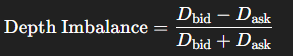


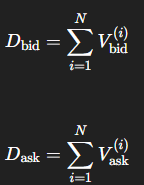

In [7]:
N_level = 5

features[f"V-bid-{N_level}-levels"] = df_cleaned["level-1-bid-volume"]
features[f"V-ask-{N_level}-levels"] = df_cleaned["level-1-ask-volume"]

for i in range(2, N_level + 1):
    features[f"V-bid-{N_level}-levels"] += df_cleaned[f"level-{i}-bid-volume"]
    features[f"V-ask-{N_level}-levels"] += df_cleaned[f"level-{i}-ask-volume"]

features[f"bid-ask-imbalance-{N_level}-levels"] = (features[f"V-bid-{N_level}-levels"] - features[f"V-ask-{N_level}-levels"])/(features[f"V-bid-{N_level}-levels"] + features[f"V-ask-{N_level}-levels"])


## Generating spread

In [8]:
features["spread"] = df_cleaned["level-1-ask-price"] - df_cleaned["level-1-bid-price"]

## Generating book slope

Used to estimate the steepness of liquidity
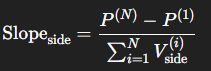

In [9]:
N_level = 5

for side in ['bid', 'ask']:
    price_col = [f"level-{i}-{side}-price" for i in range(1, N_level + 1)]
    volume_col = [f"level-{i}-{side}-volume" for i in range(1, N_level + 1)]
    P_N = df_cleaned[price_col[-1]]
    P_1 = df_cleaned[price_col[0]]
    V_sum = sum([df_cleaned[col] for col in volume_col])
    features[f"slope-{side}-{N_level}-levels"] = (P_N - P_1) / V_sum


## Generating Volume-Weighted Average Price Depth (VWAP Depth)

This gives a weighted price level that reflects available liquidity
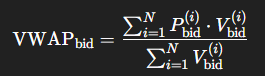

In [10]:
# Calculate VWAP for bid and ask sides over N_level depth
N_level = 5

# Bid side VWAP
bid_price_cols = [f"level-{i}-bid-price" for i in range(1, N_level + 1)]
bid_volume_cols = [f"level-{i}-bid-volume" for i in range(1, N_level + 1)]
bid_prices = df_cleaned[bid_price_cols]
bid_volumes = df_cleaned[bid_volume_cols]
vwap_bid = (bid_prices * bid_volumes).sum(axis=1) / bid_volumes.sum(axis=1)
features[f"vwap-bid-{N_level}-levels"] = vwap_bid

# Ask side VWAP
ask_price_cols = [f"level-{i}-ask-price" for i in range(1, N_level + 1)]
ask_volume_cols = [f"level-{i}-ask-volume" for i in range(1, N_level + 1)]
ask_prices = df_cleaned[ask_price_cols]
ask_volumes = df_cleaned[ask_volume_cols]
vwap_ask = (ask_prices * ask_volumes).sum(axis=1) / ask_volumes.sum(axis=1)
features[f"vwap-ask-{N_level}-levels"] = vwap_ask

features[f"avg-vwap-diff-{N_level}-levels"] = features[f"vwap-bid-{N_level}-levels"] - features[f"vwap-ask-{N_level}-levels"]

## Generating Liquidity Ratio

liquidity ratio : V_bid/V_ask

In [11]:
N_level = 5

features["liquidity-ratio"] = features[f"V-bid-{N_level}-levels"] / features[f"V-ask-{N_level}-levels"]

## Generating rates : Instantaneous volatility (variance over short windows), momentum (change in mid-price, trend indicators), and volume indicators (VWAP, average volume)

Note : average is done in terms over the number-of-transactions-window, and not over a time-window. This is done for comuting reasons.

In [12]:
window = 20  # You can adjust the window size as needed

# Mid-price calculation using df_cleaned
mid_price = (df_cleaned["level-1-bid-price"] + df_cleaned["level-1-ask-price"]) / 2

# Instantaneous volatility (rolling variance of mid-price)
features["rate-inst-volatility"] = mid_price.rolling(window=window).var()

# Momentum (change in mid-price)
features["rate-momentum"] = mid_price.diff(periods=window)

# Trend indicator (rolling mean of mid-price)
features["rate-mid-price-trend"] = mid_price.rolling(window=window).mean()

# VWAP over all levels (already computed for N_level=5)
N_level = 5
features[f"rate-vwap-diff-{N_level}-levels"] = (features[f"vwap-bid-{N_level}-levels"] - features[f"vwap-ask-{N_level}-levels"]) / 2

# Average volume over short window (using level-1 volumes)
features["rate-bid-volume-level-1"] = df_cleaned["level-1-bid-volume"].rolling(window=window).mean()
features["rate-ask-volume-level-1"] = df_cleaned["level-1-ask-volume"].rolling(window=window).mean()


In [ ]:
# Calculate time difference between consecutive timestamps
#features["timestep_diff"] = features.index.to_series().diff()
#features["timestep_transformed"] = 

## Implementing some kind of return

Warning : dataset0 is not representative, the resulting value_count is very unbalanced.

In [ ]:
# Add timestamp as a column
features["timestamp"] = features.index

mid_price = (df_cleaned["level-1-bid-price"] + df_cleaned["level-1-ask-price"]) / 2
# Calculate instantaneous return
features["inst-return"] = mid_price.diff() / features["timestamp"].diff()

## Implementing all positive for x time

In [44]:
import numpy as np

time_window = 10  # You can adjust this time window, in ms (?)

# Find, for each index, the index of the row whose timestamp is closest to (initial timestamp + time_window)
timestamps = df_cleaned.index.values
target_times = timestamps + time_window

# Use numpy searchsorted for efficient lookup
idx_next = np.searchsorted(timestamps, target_times, side="left")
idx_next[idx_next >= len(timestamps)] = len(timestamps) - 1  # Clamp to last index

# For each row, create a window from current index to idx_next (inclusive)
# and check if all returns in that window are positive
returns = features["inst-return"].values
mid_price = (df_cleaned["level-1-bid-price"] + df_cleaned["level-1-ask-price"]) / 2
returns = mid_price.diff()

# Create a boolean array where returns > 0
positive_mask = returns > 0

# For each i, we want to check if all positive_  mask[i:end+1] are True
# We can use cumulative sum to efficiently check this:
cumsum = np.cumsum(~positive_mask)  # ~positive_mask is True where returns <= 0

# For each i, the number of non-positive returns in [i, idx_next[i]] is:
# cumsum[end] - cumsum[i-1] (with care for i==0)
start_idx = np.arange(len(returns))
end_idx = idx_next

# Pad cumsum with a zero at the beginning for easier indexing
cumsum_padded = np.concatenate([[0], cumsum])

# Number of non-positive returns in window [i, end_idx[i]]
num_non_positive = (cumsum_padded[end_idx + 1] - cumsum_padded[start_idx])

# Set 1 if all positive, -1 if all negative, 0 otherwise
all_positive = 0 == num_non_positive
all_negative = (end_idx - start_idx + 1) == num_non_positive
result = np.zeros(len(returns), dtype=int)
result[all_positive] = 1
result[all_negative] = -1

features[f"return-all-singed-for-{time_window}-ms"] = result

In [45]:
features[f"return-all-singed-for-{time_window}-ms"].value_counts()

return-all-singed-for-10-ms
 0    1714105
-1     103578
 1          2
Name: count, dtype: int64

## Saving to csv

In [ ]:
features.to_parquet(f'../data/features/DATA_{I}/{coin}_EUR.parquet', index=True)

In [21]:
features

,level-1-bid-price,level-1-bid-volume,level-2-bid-price,level-2-bid-volume,level-3-bid-price,level-3-bid-volume,level-4-bid-price,level-4-bid-volume,level-5-bid-price,level-5-bid-volume,...,vwap-bid-5-levels,vwap-ask-5-levels,avg-vwap-diff-5-levels,liquidity-ratio,rate-vwap-diff-5-levels,rate-bid-volume-level-1,rate-ask-volume-level-1,timestamp,inst-return,return-all-singed-for-x-ms
timestamp,,,,,,,,,,,,,,,,,,,,,
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,0.0,0.0,0.0,1.755425,0.0,NaN,NaN,1.748488e+09,NaN,0
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,0.0,0.0,0.0,3.109557,0.0,NaN,NaN,1.748488e+09,NaN,0
1.748488e+09,2453.02000,4.500000,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,2452.540000,19.140000,...,0.0,0.0,0.0,1.721685,0.0,NaN,NaN,1.748488e+09,NaN,0
1.748488e+09,2453.02000,4.500000,2452.990000,36.246716,2452.940000,36.247509,2452.770000,36.249957,2452.610000,36.252261,...,0.0,0.0,0.0,1.944153,0.0,NaN,NaN,1.748488e+09,NaN,0
1.748488e+09,2453.02000,4.500000,2452.990000,36.246716,2452.940000,36.247509,2452.890000,1.924000,2452.770000,36.249957,...,0.0,0.0,0.0,1.497725,0.0,NaN,NaN,1.748488e+09,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.748523e+09,2376.28000,37.133149,2375.880000,3.367000,2375.690000,0.019773,2375.680000,12.644000,2375.560000,4.500000,...,0.0,0.0,0.0,1.481425,0.0,27.741842,14.567612,1.748523e+09,-2.824413,0
1.748523e+09,2376.19446,11.808537,2375.876711,0.856580,2375.680005,9.487943,2375.676152,3.914128,2375.566923,3.626043,...,0.0,0.0,0.0,1.370885,0.0,26.475665,13.936600,1.748523e+09,-245.337438,0
1.748523e+09,2375.88000,3.367000,2375.690000,0.019773,2375.680000,12.644000,2375.660000,1.004171,2375.560000,4.500000,...,0.0,0.0,0.0,4.899679,0.0,25.912914,13.936600,1.748523e+09,-44.605039,0


In [ ]:
print(features.columns.tolist())

['level-1-bid-price', 'level-1-bid-volume', 'level-2-bid-price', 'level-2-bid-volume', 'level-3-bid-price', 'level-3-bid-volume', 'level-4-bid-price', 'level-4-bid-volume', 'level-5-bid-price', 'level-5-bid-volume', 'level-6-bid-price', 'level-6-bid-volume', 'level-7-bid-price', 'level-7-bid-volume', 'level-8-bid-price', 'level-8-bid-volume', 'level-9-bid-price', 'level-9-bid-volume', 'level-10-bid-price', 'level-10-bid-volume', 'level-1-ask-price', 'level-1-ask-volume', 'level-2-ask-price', 'level-2-ask-volume', 'level-3-ask-price', 'level-3-ask-volume', 'level-4-ask-price', 'level-4-ask-volume', 'level-5-ask-price', 'level-5-ask-volume', 'level-6-ask-price', 'level-6-ask-volume', 'level-7-ask-price', 'level-7-ask-volume', 'level-8-ask-price', 'level-8-ask-volume', 'level-9-ask-price', 'level-9-ask-volume', 'level-10-ask-price', 'level-10-ask-volume', 'V-bid-5-levels', 'V-ask-5-levels', 'bid-ask-imbalance-5-levels', 'spread', 'slope-bid-5-levels', 'slope-ask-5-levels', 'vwap-bid-5-lev